# Mapping

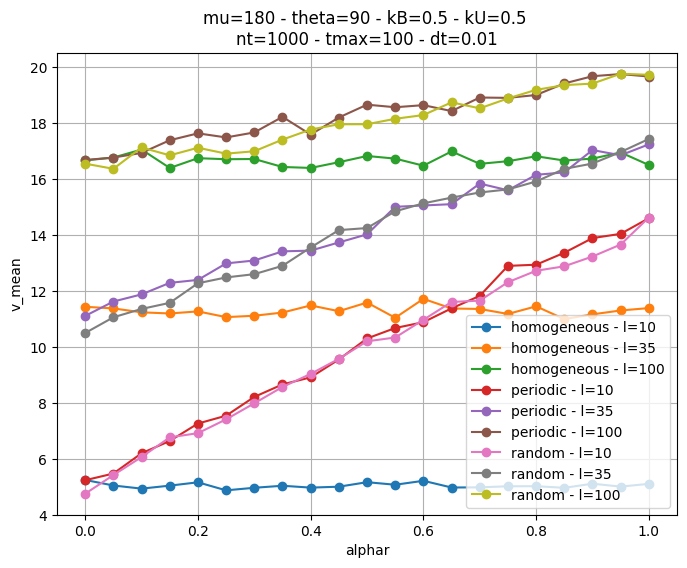

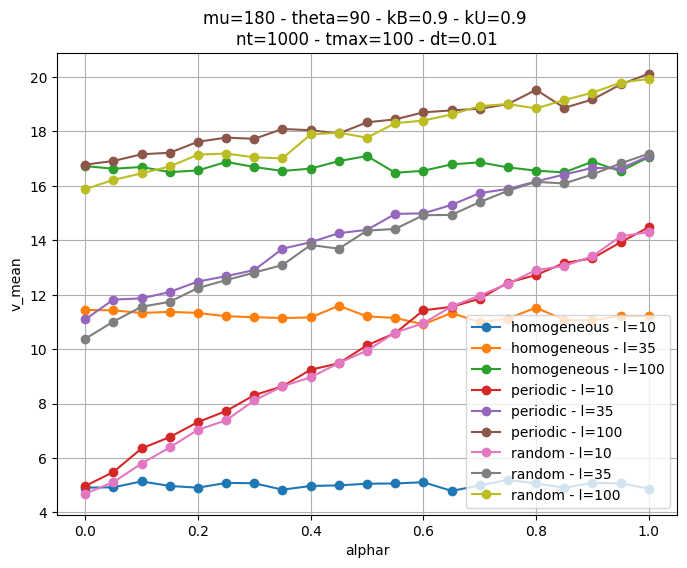

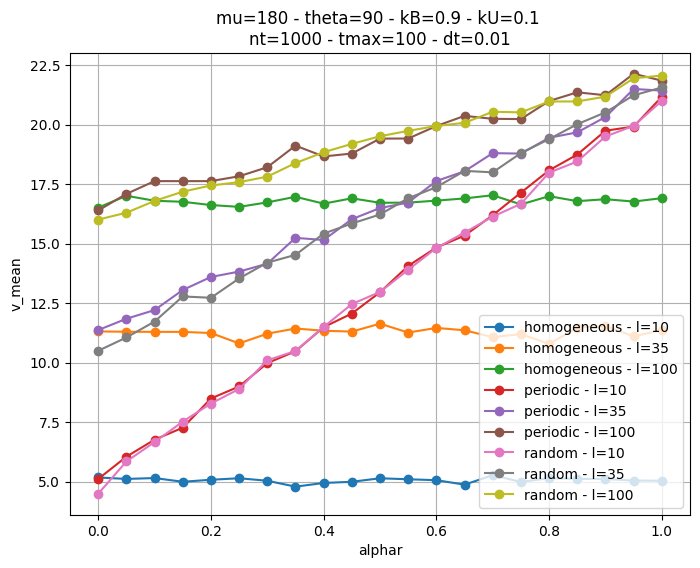

In [3]:
# Verification

from itertools import product
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import polars as pl


# Load files
root = Path("/home/nicolas/Documents/PhD/Workspace/nucleo/outputs/2026-01-06__PC/nucleo__perftest_0")
paths = [str(p) for p in root.glob("*/**/*.parquet")] or [str(p) for p in root.glob("*/*.parquet")]
df_all = (
    pl.scan_parquet(paths)
    .collect()
    .sort(by=["landscape", "s", "l", "lmbda", "alphar"])
)


landscapes  = np.unique(df_all["landscape"].to_numpy())
ls          = np.unique(df_all["l"].to_numpy())
alphars     = np.unique(df_all["alphar"].to_numpy())
kBs         = np.unique(df_all["kB"].to_numpy())
kUs         = np.unique(df_all["kU"].to_numpy())

mu         = np.unique(df_all["mu"])[0]
theta      = np.unique(df_all["theta"])[0]
nt         = np.unique(df_all["nt"])[0]
tmax       = np.unique(df_all["tmax"])[0]
dt         = np.unique(df_all["dt"])[0]

kB1 = kU1 = 0.50

title = f"mu={mu} - theta={theta} - kB={kB1} - kU={kU1} \nnt={nt} - tmax={tmax} - dt={dt}"
plt.figure(figsize=(8,6))
plt.title(title)

for landscape, l in product(landscapes, ls):
    
    subtitle = f"{landscape} - l={l}"
    df_data = df_all.filter(
        (pl.col("landscape") == landscape) & 
        (pl.col("l") == l) & 
        (pl.col("kB").is_close(kB1)) & 
        (pl.col("kU").is_close(kU1))
    )

    v_mean = df_data["v_mean"].to_numpy()
    alphar = df_data["alphar"].to_numpy()
    plt.plot(alphar, v_mean, marker="o", label=subtitle)

plt.xlabel("alphar")
plt.ylabel("v_mean")
plt.legend(fontsize=10)
plt.grid(True)
plt.show()




kB2 = kU2 = 0.90

title = f"mu={mu} - theta={theta} - kB={kB2} - kU={kU2} \nnt={nt} - tmax={tmax} - dt={dt}"
plt.figure(figsize=(8,6))
plt.title(title)

for landscape, l in product(landscapes, ls):
    
    subtitle = f"{landscape} - l={l}"
    df_data = df_all.filter(
        (pl.col("landscape") == landscape) & 
        (pl.col("l") == l) & 
        (pl.col("kB").is_close(kB2)) & 
        (pl.col("kU").is_close(kU2))
    )

    v_mean = df_data["v_mean"].to_numpy()
    alphar = df_data["alphar"].to_numpy()
    plt.plot(alphar, v_mean, marker="o", label=subtitle)


plt.xlabel("alphar")
plt.ylabel("v_mean")
plt.legend(fontsize=10)
plt.grid(True)
plt.show()



kB3 = 0.90
kU3 = 0.10

title = f"mu={mu} - theta={theta} - kB={kB3} - kU={kU3} \nnt={nt} - tmax={tmax} - dt={dt}"
plt.figure(figsize=(8,6))
plt.title(title)

for landscape, l in product(landscapes, ls):
    
    subtitle = f"{landscape} - l={l}"
    df_data = df_all.filter(
        (pl.col("landscape") == landscape) & 
        (pl.col("l") == l) & 
        (pl.col("kB").is_close(kB3)) & 
        (pl.col("kU").is_close(kU3))
    )

    v_mean = df_data["v_mean"].to_numpy()
    alphar = df_data["alphar"].to_numpy()
    plt.plot(alphar, v_mean, marker="o", label=subtitle)


plt.xlabel("alphar")
plt.ylabel("v_mean")
plt.legend(fontsize=10)
plt.grid(True)
plt.show()

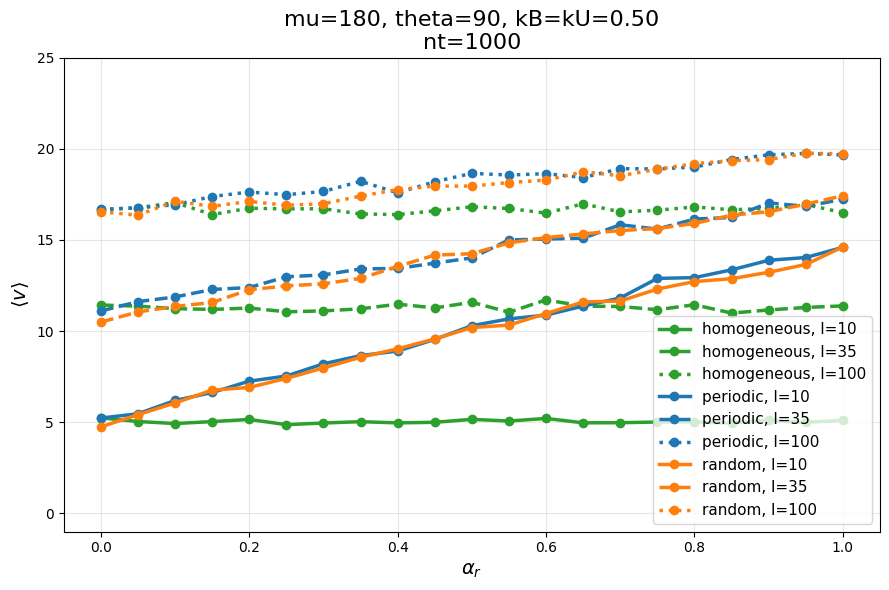

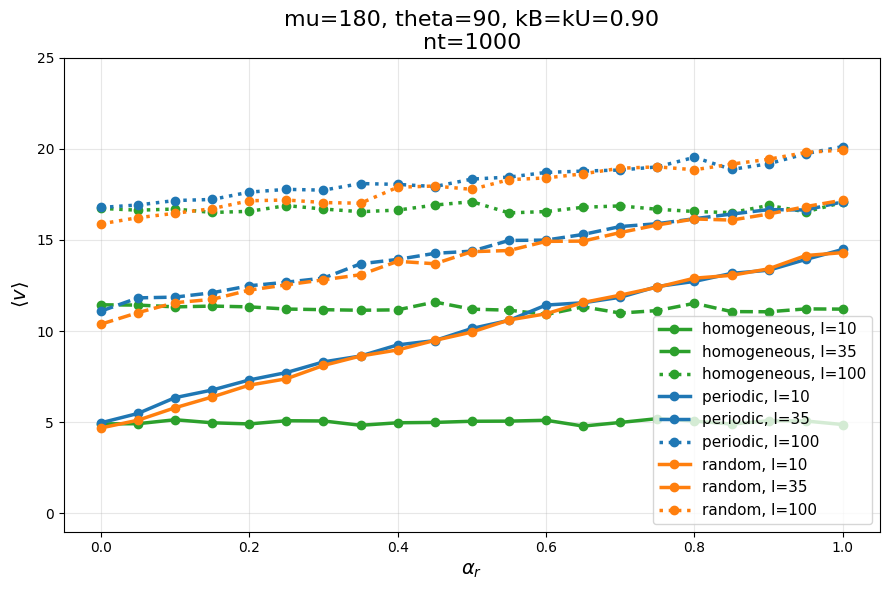

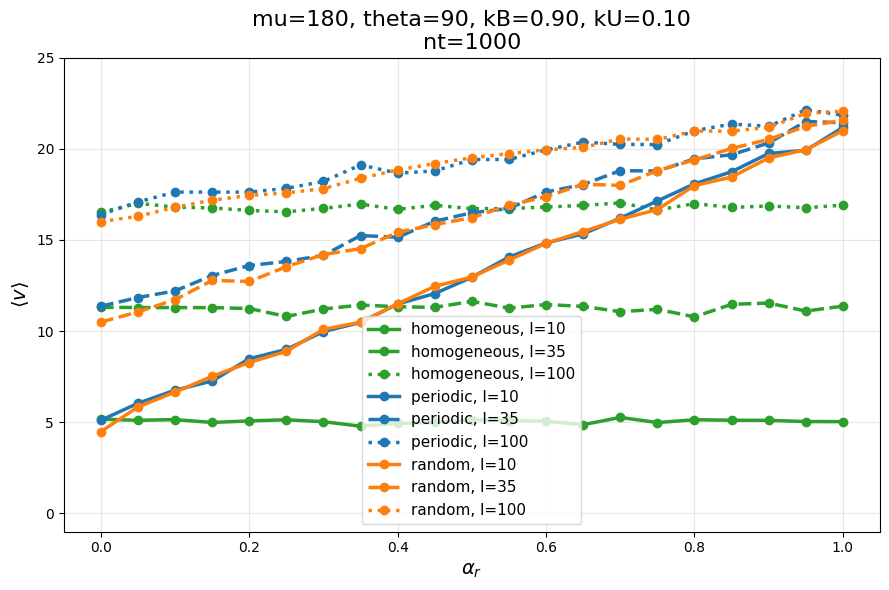

In [4]:
# Couleurs par landscape
landscape_colors = {
    "periodic": "tab:blue",
    "random": "tab:orange",
    "homogeneous": "tab:green",
}

# Styles par l (ordonnés)
ls_sorted = np.sort(ls)
linestyles = {
    ls_sorted[0]: "-",
    ls_sorted[1]: "--",
    ls_sorted[2]: ":",
}


def plot_vmean_vs_alphar(df_all, kB, kU, title):

    plt.figure(figsize=(9, 6))
    plt.title(title, fontsize=16)

    for landscape, l in product(landscapes, ls):

        df_data = df_all.filter(
            (pl.col("landscape") == landscape) &
            (pl.col("l") == l) &
            (pl.col("kB").is_close(kB)) &
            (pl.col("kU").is_close(kU))
        )

        if df_data.height == 0:
            continue

        alphar = df_data["alphar"].to_numpy()
        v_mean = df_data["v_mean"].to_numpy()

        plt.plot(
            alphar,
            v_mean,
            color=landscape_colors[landscape],
            linestyle=linestyles[l],
            marker="o",
            linewidth=2.5,
            label=f"{landscape}, l={l}",
        )

    plt.xlabel(r"$\alpha_r$", fontsize=14)
    plt.ylabel(r"$\langle v \rangle$", fontsize=14)
    plt.ylim([-1, 25])
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=11, frameon=True)
    plt.tight_layout()
    plt.show()
    
    
plot_vmean_vs_alphar(
    df_all,
    kB=0.50,
    kU=0.50,
    title=f"mu={mu}, theta={theta}, kB=kU=0.50\nnt={nt}"
)

plot_vmean_vs_alphar(
    df_all,
    kB=0.90,
    kU=0.90,
    title=f"mu={mu}, theta={theta}, kB=kU=0.90\nnt={nt}"
)

plot_vmean_vs_alphar(
    df_all,
    kB=0.90,
    kU=0.10,
    title=f"mu={mu}, theta={theta}, kB=0.90, kU=0.10\nnt={nt}"
)



In [5]:
# Librairies
from itertools import product
import polars as pl
import numpy as np
from itertools import product
from pathlib import Path


# Load files
root = Path("/home/nicolas/Documents/PhD/Workspace/nucleo/outputs/2026-01-08__PC/nucleo__perftest_0")
paths = [str(p) for p in root.glob("*/**/*.parquet")] or [str(p) for p in root.glob("*/*.parquet")]
lf = pl.scan_parquet(paths)
schema = lf.schema

scalar_dtypes = (
    pl.Int8, pl.Int16, pl.Int32, pl.Int64,
    pl.UInt8, pl.UInt16, pl.UInt32, pl.UInt64,
    pl.Float32, pl.Float64,
    pl.Boolean, pl.String
)

cols_scalar = [
    name for name, dtype in schema.items()
    if isinstance(dtype, scalar_dtypes)
]

df_all = (
    pl.scan_parquet(paths)
    .select(cols_scalar)
    .collect()
    .sort(by=["landscape", "s", "l", "lmbda", "alphar"])
)


landscapes = np.unique(df_all["landscape"].to_numpy())
ls         = np.unique(df_all["l"].to_numpy())
ss         = np.unique(df_all["s"].to_numpy())
kbS        = np.unique(df_all["kB"].to_numpy())
kUs        = np.unique(df_all["kU"].to_numpy())
alphars    = np.unique(df_all["alphar"].to_numpy())

kBs  = df_all["kB"].to_numpy()
kUs  = df_all["kU"].to_numpy()
K    = kBs / (kBs + kUs)

df_all = df_all.with_columns([
    pl.lit(K).alias("K"),
    pl.lit(None).alias("v_nr"),
    pl.lit(None).alias("v_diff"),
    pl.lit(None).alias("v_ratio")
])

print(landscapes, ls, ss, kbS, kUs, alphars)
print(df_all)

/tmp/ipykernel_462762/2795819529.py:13: PerformanceWarning: Resolving the schema of a LazyFrame is a potentially expensive operation. Use `LazyFrame.collect_schema()` to get the schema without this warning.
  schema = lf.schema


['homogeneous' 'periodic' 'random'] [ 10  20  30  40  50 100 150] [35] [0.1 0.3 0.5 0.7 0.9] [0.9 0.1 0.3 ... 0.1 0.3 0.9] [0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]
shape: (11_025, 40)
┌───────────┬─────────────┬─────┬─────┬───┬──────────┬──────┬────────┬─────────┐
│ FORMALISM ┆ landscape   ┆ s   ┆ l   ┆ … ┆ K        ┆ v_nr ┆ v_diff ┆ v_ratio │
│ ---       ┆ ---         ┆ --- ┆ --- ┆   ┆ ---      ┆ ---  ┆ ---    ┆ ---     │
│ str       ┆ str         ┆ i64 ┆ i64 ┆   ┆ f64      ┆ null ┆ null   ┆ null    │
╞═══════════╪═════════════╪═════╪═════╪═══╪══════════╪══════╪════════╪═════════╡
│ 3         ┆ homogeneous ┆ 35  ┆ 10  ┆ … ┆ 0.357143 ┆ null ┆ null   ┆ null    │
│ 3         ┆ homogeneous ┆ 35  ┆ 10  ┆ … ┆ 0.9      ┆ null ┆ null   ┆ null    │
│ 3         ┆ homogeneous ┆ 35  ┆ 10  ┆ … ┆ 0.5      ┆ null ┆ null   ┆ null    │
│ 3         ┆ homogeneous ┆ 35  ┆ 10  ┆ … ┆ 0.25     ┆ null ┆ null   ┆ null    │
│ 3         ┆ homoge

In [6]:
for landscape, l in product(landscapes, ls):
    df_zero = df_all.filter(
        (pl.col("landscape") == landscape) & 
        (pl.col("l") == l) & 
        (pl.col("alphar").is_close(0))
    )
    
    vnr = np.mean(df_zero["v_mean"].to_numpy())
    
    mask = (pl.col("landscape") == landscape) & (pl.col("l") == l)
    
    df_all = df_all.with_columns([
        pl.when(mask)
          .then(pl.lit(vnr))
          .otherwise(pl.col("v_nr"))
          .alias("v_nr"),
        
        pl.when(mask)
          .then((pl.col("v_mean") - vnr))
          .otherwise(pl.col("v_diff"))
          .alias("v_diff"),
          
        pl.when(mask)
          .then((pl.col("v_mean") / vnr))
          .otherwise(pl.col("v_ratio"))
          .alias("v_ratio")
    ])

# Replace the infs
df_all = df_all.with_columns(
    pl.when(pl.col("v_diff").is_infinite())
      .then(None)
      .otherwise(pl.col("v_diff"))
      .alias("v_diff")
)

df_all = df_all.with_columns(
    pl.when(pl.col("v_ratio").is_infinite())
      .then(None)
      .otherwise(pl.col("v_ratio"))
      .alias("v_ratio")
)

print(df_all)

shape: (11_025, 40)
┌───────────┬─────────────┬─────┬─────┬───┬──────────┬───────────┬───────────┬──────────┐
│ FORMALISM ┆ landscape   ┆ s   ┆ l   ┆ … ┆ K        ┆ v_nr      ┆ v_diff    ┆ v_ratio  │
│ ---       ┆ ---         ┆ --- ┆ --- ┆   ┆ ---      ┆ ---       ┆ ---       ┆ ---      │
│ str       ┆ str         ┆ i64 ┆ i64 ┆   ┆ f64      ┆ f64       ┆ f64       ┆ f64      │
╞═══════════╪═════════════╪═════╪═════╪═══╪══════════╪═══════════╪═══════════╪══════════╡
│ 3         ┆ homogeneous ┆ 35  ┆ 10  ┆ … ┆ 0.357143 ┆ 5.105805  ┆ -0.001115 ┆ 0.999782 │
│ 3         ┆ homogeneous ┆ 35  ┆ 10  ┆ … ┆ 0.9      ┆ 5.105805  ┆ -0.022336 ┆ 0.995625 │
│ 3         ┆ homogeneous ┆ 35  ┆ 10  ┆ … ┆ 0.5      ┆ 5.105805  ┆ -0.093537 ┆ 0.98168  │
│ 3         ┆ homogeneous ┆ 35  ┆ 10  ┆ … ┆ 0.25     ┆ 5.105805  ┆ 0.138045  ┆ 1.027037 │
│ 3         ┆ homogeneous ┆ 35  ┆ 10  ┆ … ┆ 0.625    ┆ 5.105805  ┆ 0.147674  ┆ 1.028923 │
│ …         ┆ …           ┆ …   ┆ …   ┆ … ┆ …        ┆ …         ┆ …         ┆ …

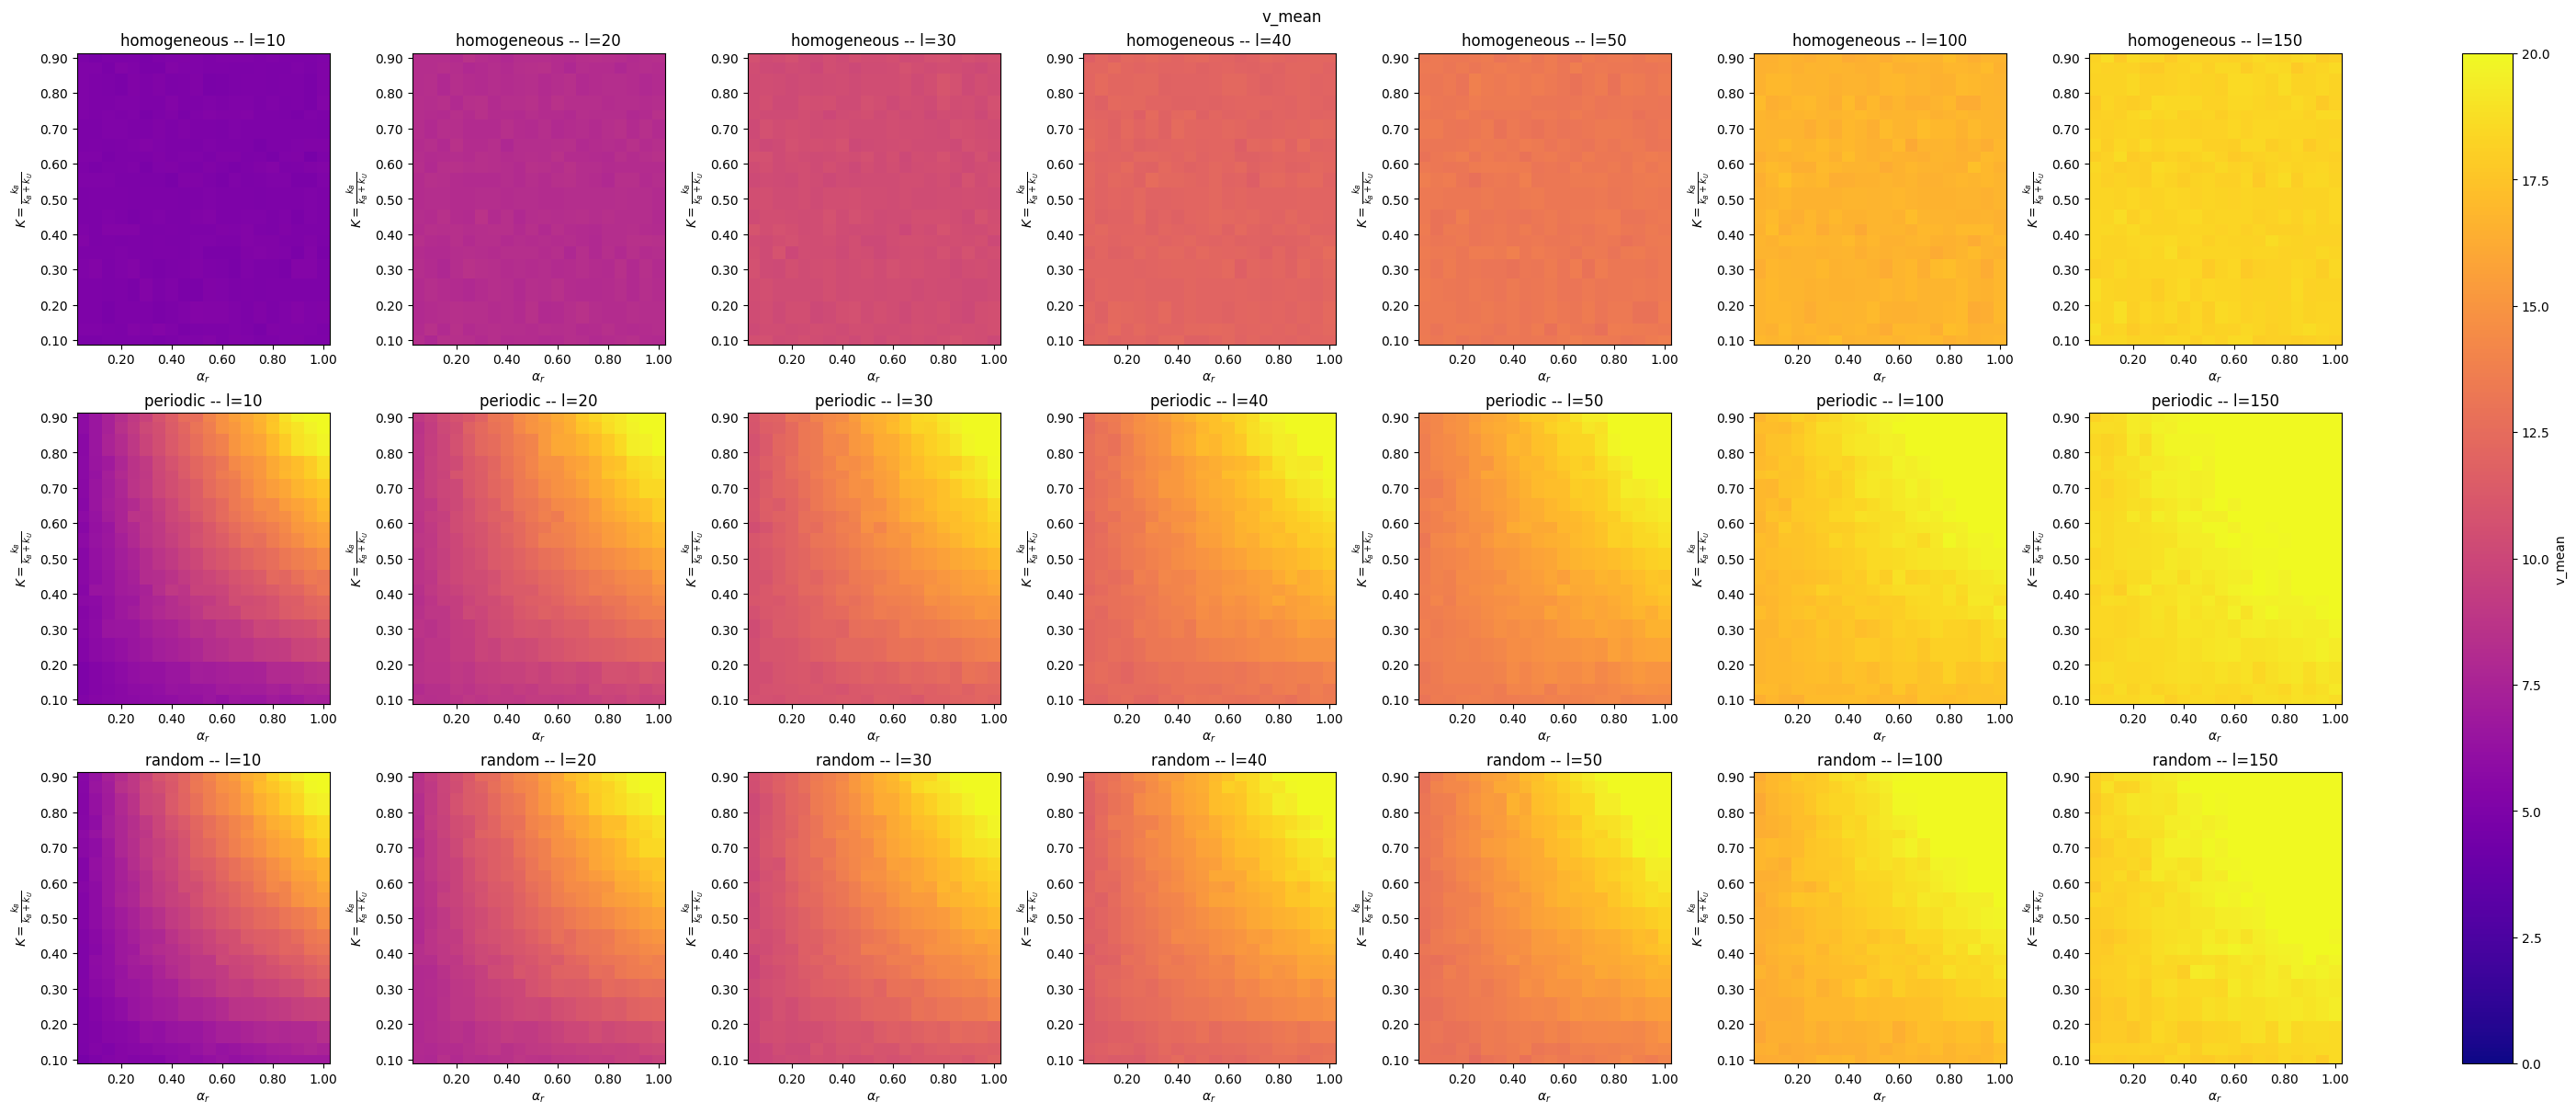

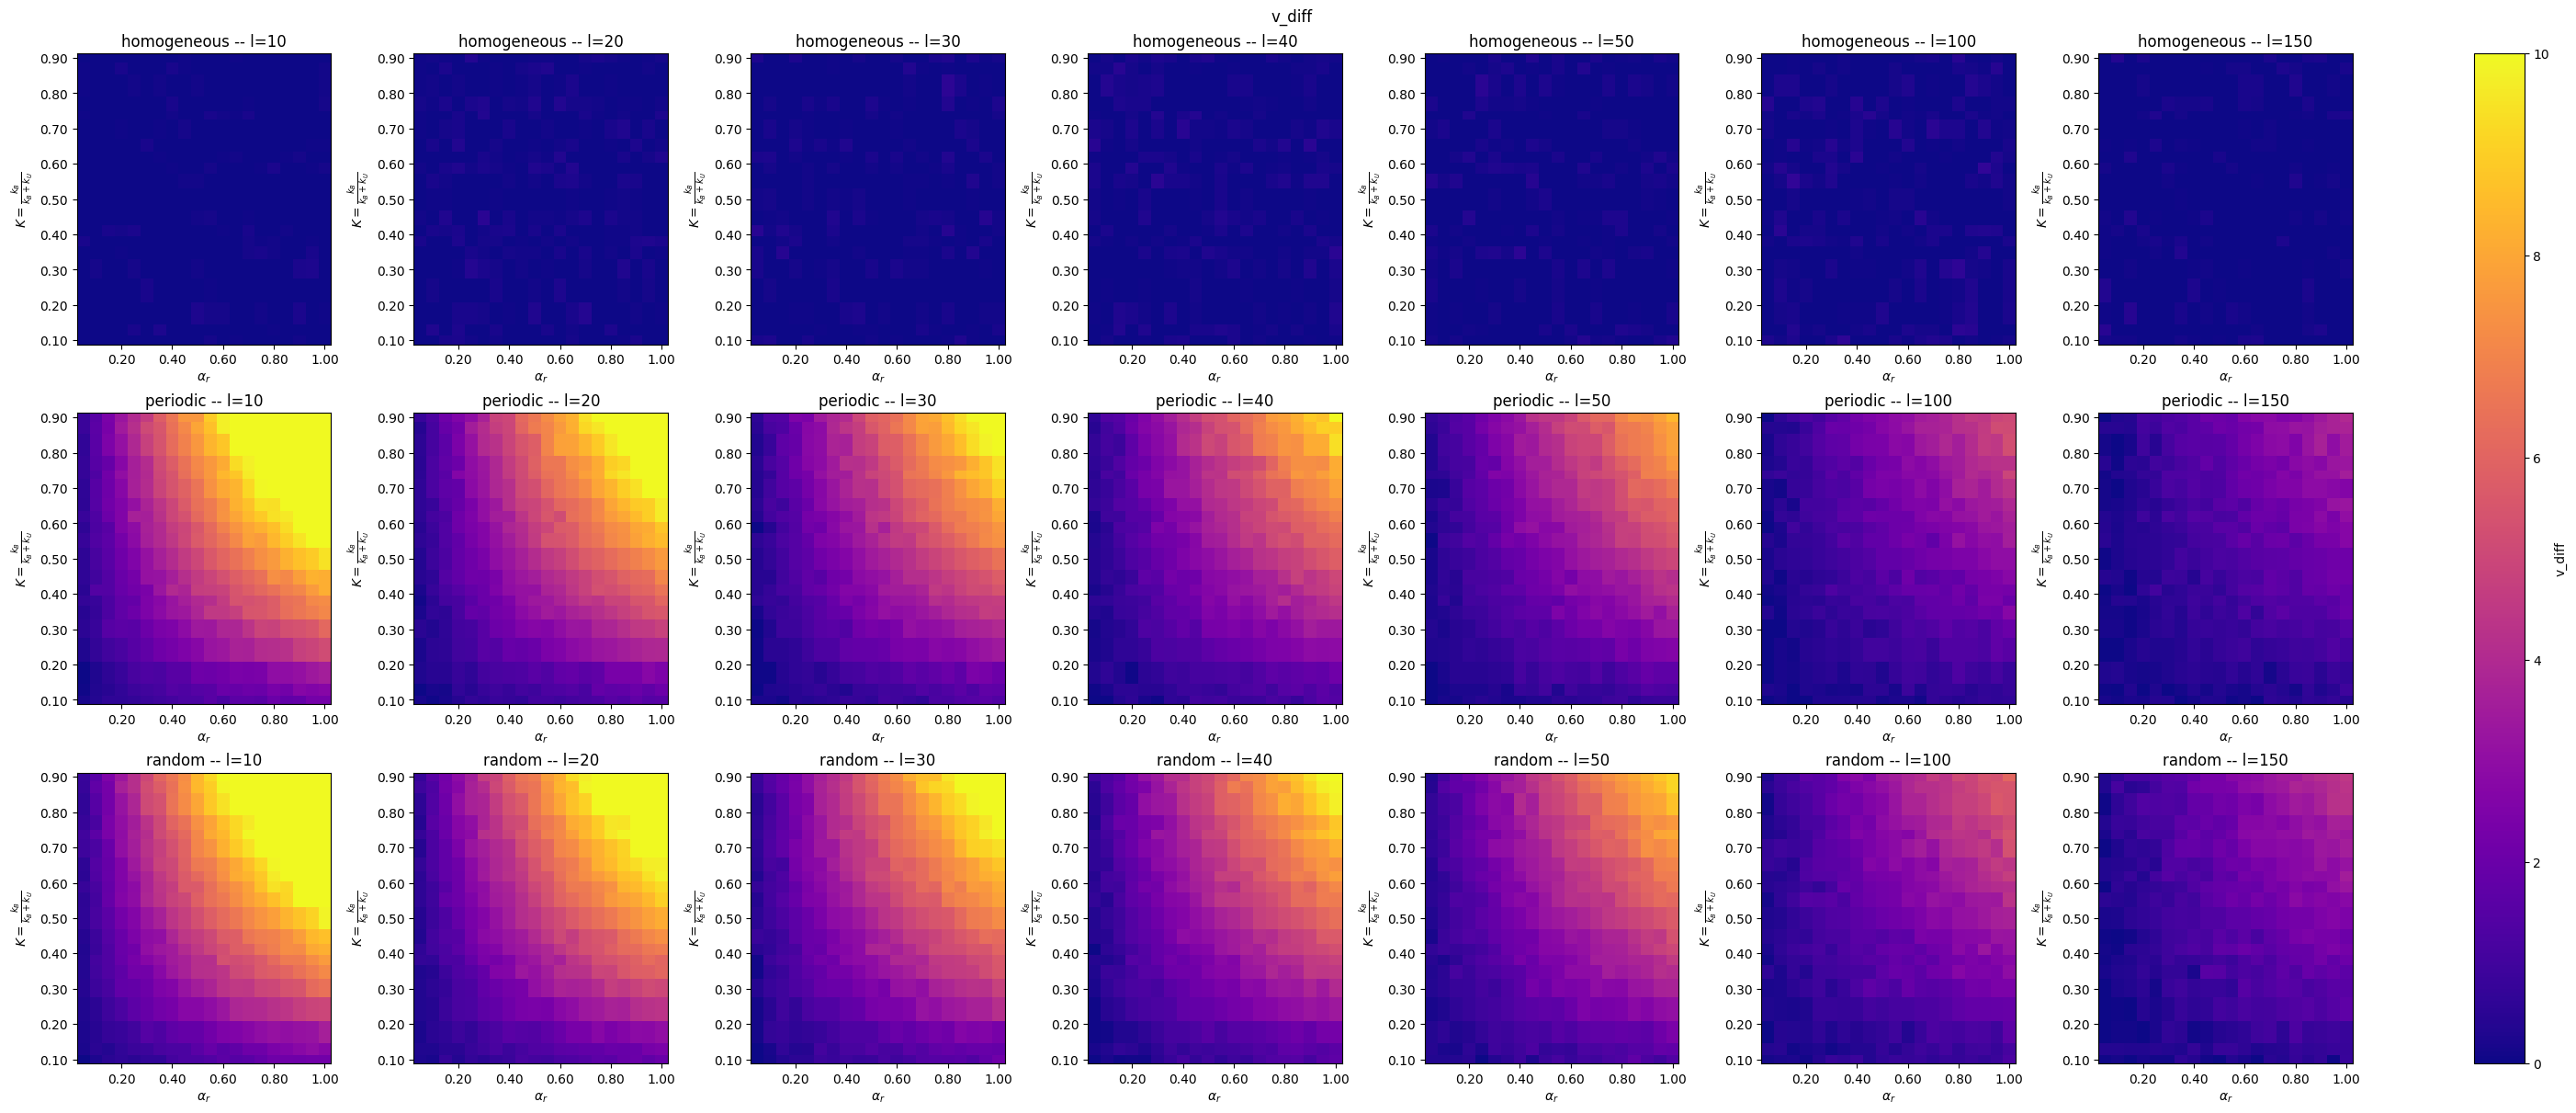

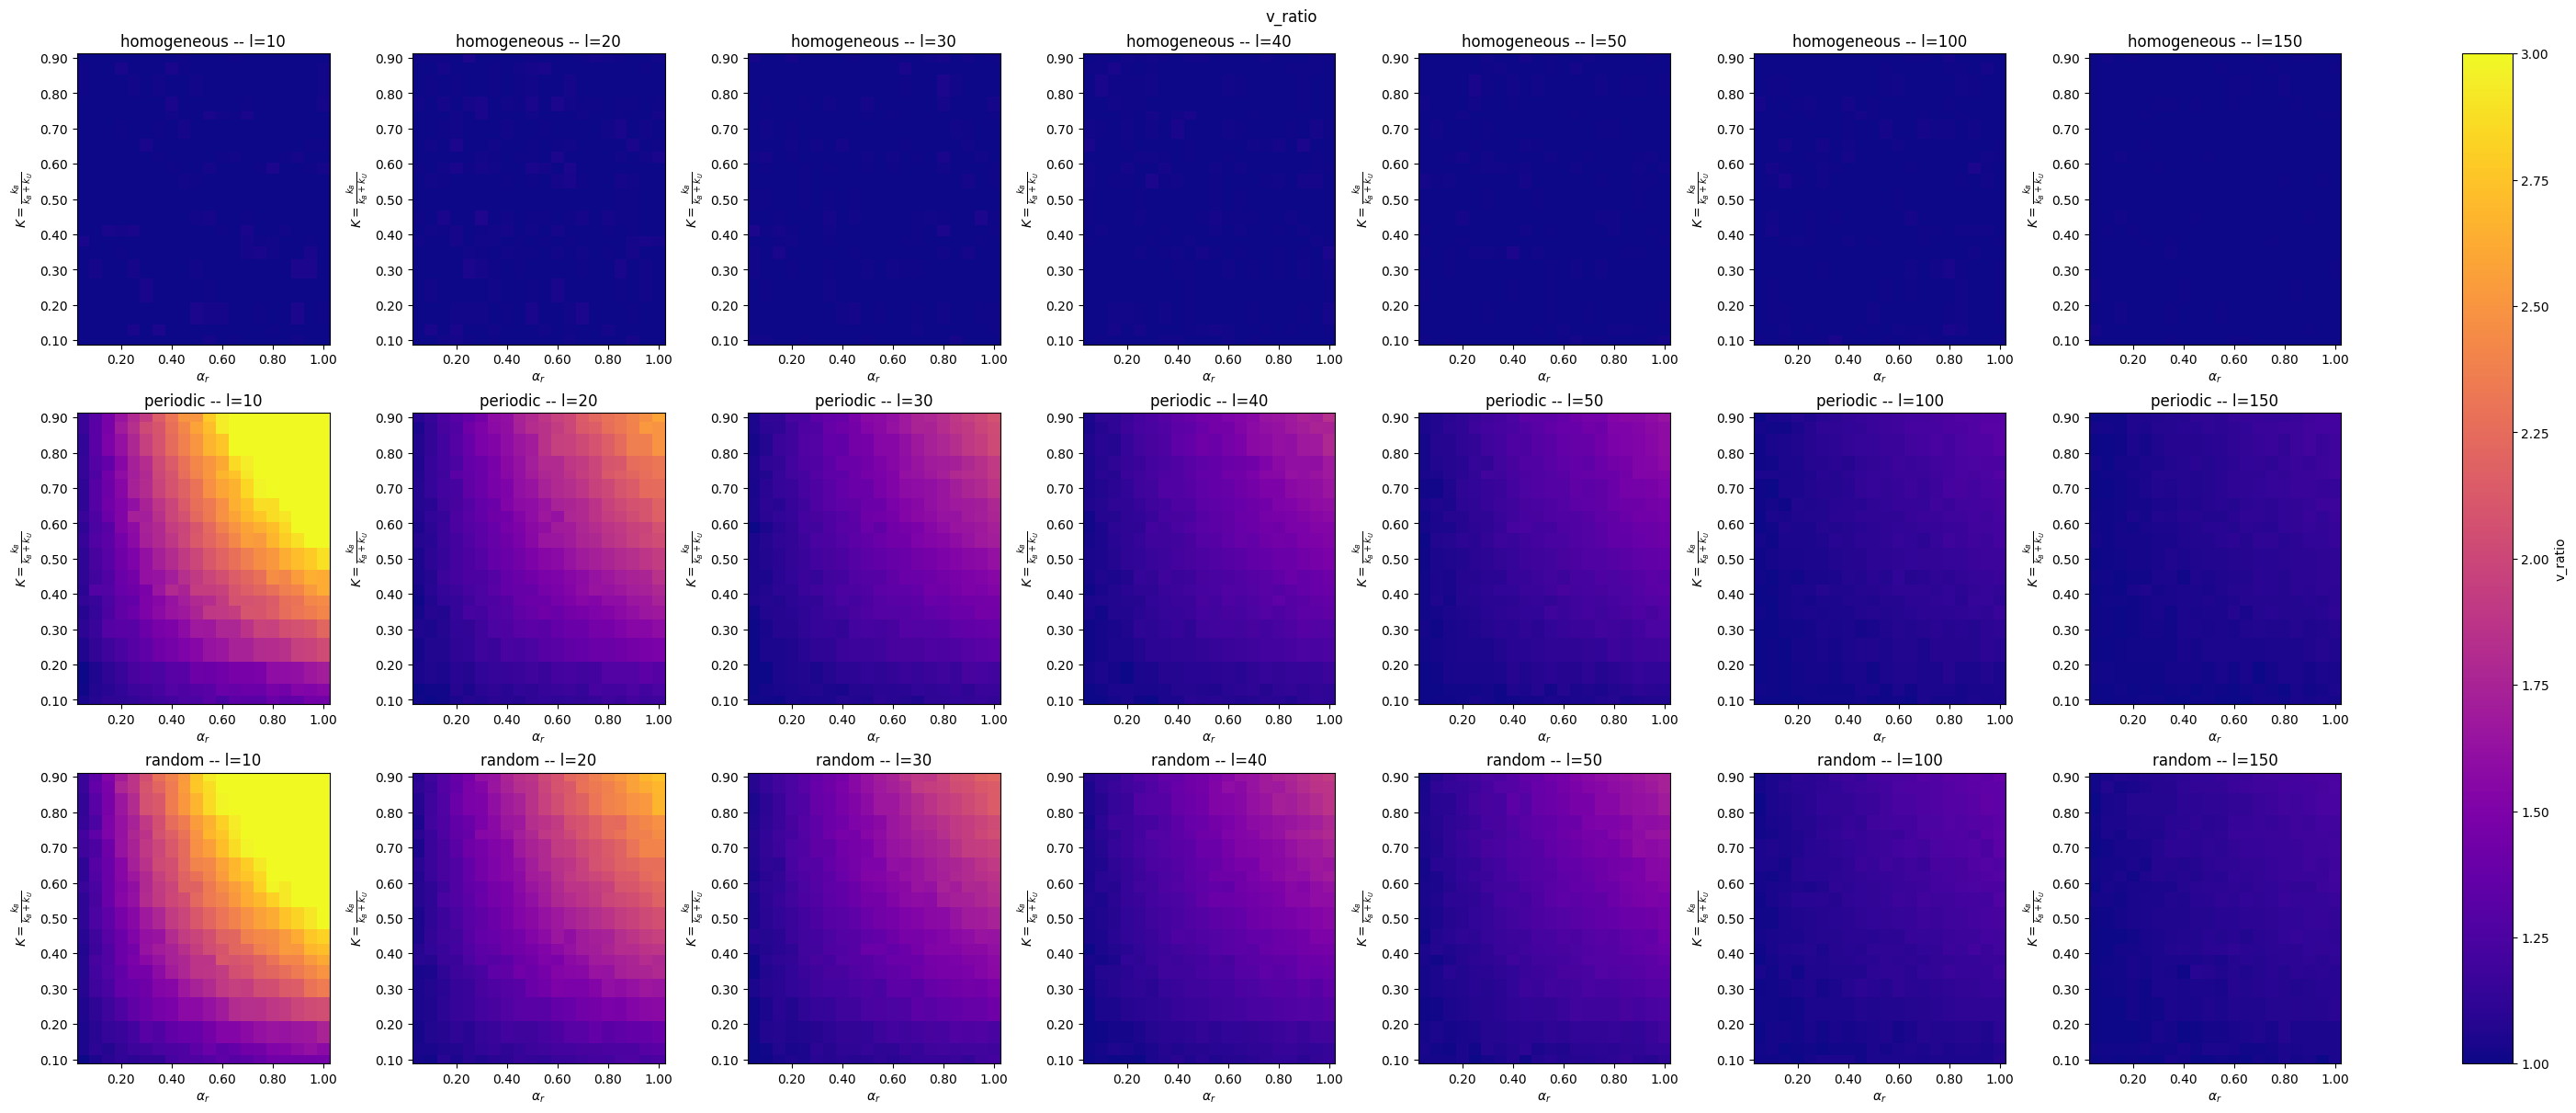

In [7]:
from itertools import product
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
import numpy as np
import polars as pl


def plot_single_heatmap(
    df: pl.DataFrame,
    landscape: str,
    l: int,
    value: str,
    ax,
    log_plot: bool = False,
    cmap: str = "plasma",
):
    """
    Plot a heatmap of `value` as a function of alphar (x) and K (y)
    for a given landscape and l.
    """

    # 1) Consistent filtering (alphar = 0 is removed at the source)
    df_heat = (
        df.filter(
            (pl.col("landscape") == landscape) &
            (pl.col("l") == l) &
            (pl.col("alphar") > 0)
        )
        .select(["alphar", "K", value])
        .sort(["K", "alphar"])
    )

    if df_heat.height == 0:
        ax.set_title(f"{landscape} -- l={l}\n(no data)")
        return None

    # 2) Pivot → the grid comes from the pivot (source of truth)
    pivot = (
        df_heat
        .to_pandas()
        .pivot_table(
            values=value,
            index="K",
            columns="alphar",
            aggfunc="mean"
        )
        .sort_index()
        .sort_index(axis=1)
    )

    Z2D = pivot.values
    X = pivot.columns.to_numpy()
    Y = pivot.index.to_numpy()
    X_grid, Y_grid = np.meshgrid(X, Y)

    # 3) Scale (lin / log)
    if log_plot:
        Z2D = np.log2(Z2D)
        vmin, vmax = -2, 2
        label = rf"$\log_2({value})$"
    else:
        label = value
        if value == "v_mean":
            vmin, vmax = 0, 20
        elif value == "v_diff":
            vmin, vmax = 0, 10
        elif value == "v_ratio":
            vmin, vmax = 1, 3

    # 4) Plot
    c = ax.pcolormesh(
        X_grid,
        Y_grid,
        Z2D,
        cmap=cmap,
        shading="auto",
        vmin=vmin,
        vmax=vmax,
    )

    ax.set_title(f"{landscape} -- l={l}")
    ax.set_xlabel(r"$\alpha_r$")
    ax.set_ylabel(r"$K = \frac{k_B}{k_B + k_U}$")

    ax.xaxis.set_major_formatter(mticker.FormatStrFormatter('%.2f'))
    ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.2f'))

    return c

# Call v_mean
value = "v_mean"
n_rows = len(landscapes)
n_cols = len(ls)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 4*n_rows), constrained_layout=True)
axes_flat = axes.flatten() if axes.ndim > 1 else axes
plt.suptitle(value)

for ax, (landscape, l) in zip(axes_flat, product(landscapes, ls)):
    c = plot_single_heatmap(df_all, landscape, l, value, ax)
fig.colorbar(c, ax=axes_flat, orientation='vertical', label=value)
plt.show()


# Call diff_v
value = "v_diff"
n_rows = len(landscapes)
n_cols = len(ls)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 4*n_rows), constrained_layout=True)
axes_flat = axes.flatten() if axes.ndim > 1 else axes
plt.suptitle(value)

for ax, (landscape, l) in zip(axes_flat, product(landscapes, ls)):
    c = plot_single_heatmap(df_all, landscape, l, value, ax)
fig.colorbar(c, ax=axes_flat, orientation='vertical', label=value)
plt.show()

# Call ratio
value = "v_ratio"
n_rows = len(landscapes)
n_cols = len(ls)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(4*n_cols, 4*n_rows), constrained_layout=True)
axes_flat = axes.flatten() if axes.ndim > 1 else axes
plt.suptitle(value)

for ax, (landscape, l) in zip(axes_flat, product(landscapes, ls)):
    c = plot_single_heatmap(df_all, landscape, l, value, ax)
fig.colorbar(c, ax=axes_flat, orientation='vertical', label=value)
plt.show()


# ---- Observations ---- #
# K joue un rôle plus important que alphar : on peut supposer que c'est la fréquence d'un repliement même léger qui jour un rôle plus important que son déroulement total
# Plus le linker est petit plus la différence est importante : des facteurs de transcription efficaces en fréquences permettent à des chromatines denses d'être extrudées vite
# Le remodellage aide plus dans les cas aléatoires que dans les cas périodiques


# ---- Remarques ---- #
# C'est la différence comparé a without remodellage
# Et non la vitesse comparée à scenario plat without remodellage !!
# A mettre en log2 d'ailleurs


# FACTMODES

/tmp/ipykernel_1551896/426859137.py:18: PerformanceWarning: Resolving the schema of a LazyFrame is a potentially expensive operation. Use `LazyFrame.collect_schema()` to get the schema without this warning.
  schema = lf.schema


['algorithm', 'fact', 'factmode', 'landscape', 's', 'l', 'bpmin', 'mu', 'theta', 'alphaf', 'alphao', 'beta', 'lmbda', 'rtot_capt', 'rtot_rest', 'alphad', 'alphar', 'kB', 'kU', 'Lmin', 'Lmax', 'bps', 'origin', 'tmax', 'dt', 'nt', 's_mean', 'l_mean', 'alpha_mean_v', 'alpha_mean_c', 'v_mean', 'v_med', 'v_mean_th', 'v_mean_th_eff', 'vf', 'Cf', 'wf', 'vf_std', 'Cf_std', 'wf_std', 'vi_mean', 'vi_med', 'vi_mp', 'c_linker', 'c_nucleo', 'vi_bp_mean', 'vi_bp_med']
(792, 47)
(132, 47)
(132, 47)
132
mus=[150 180] - thetas=[20 90]


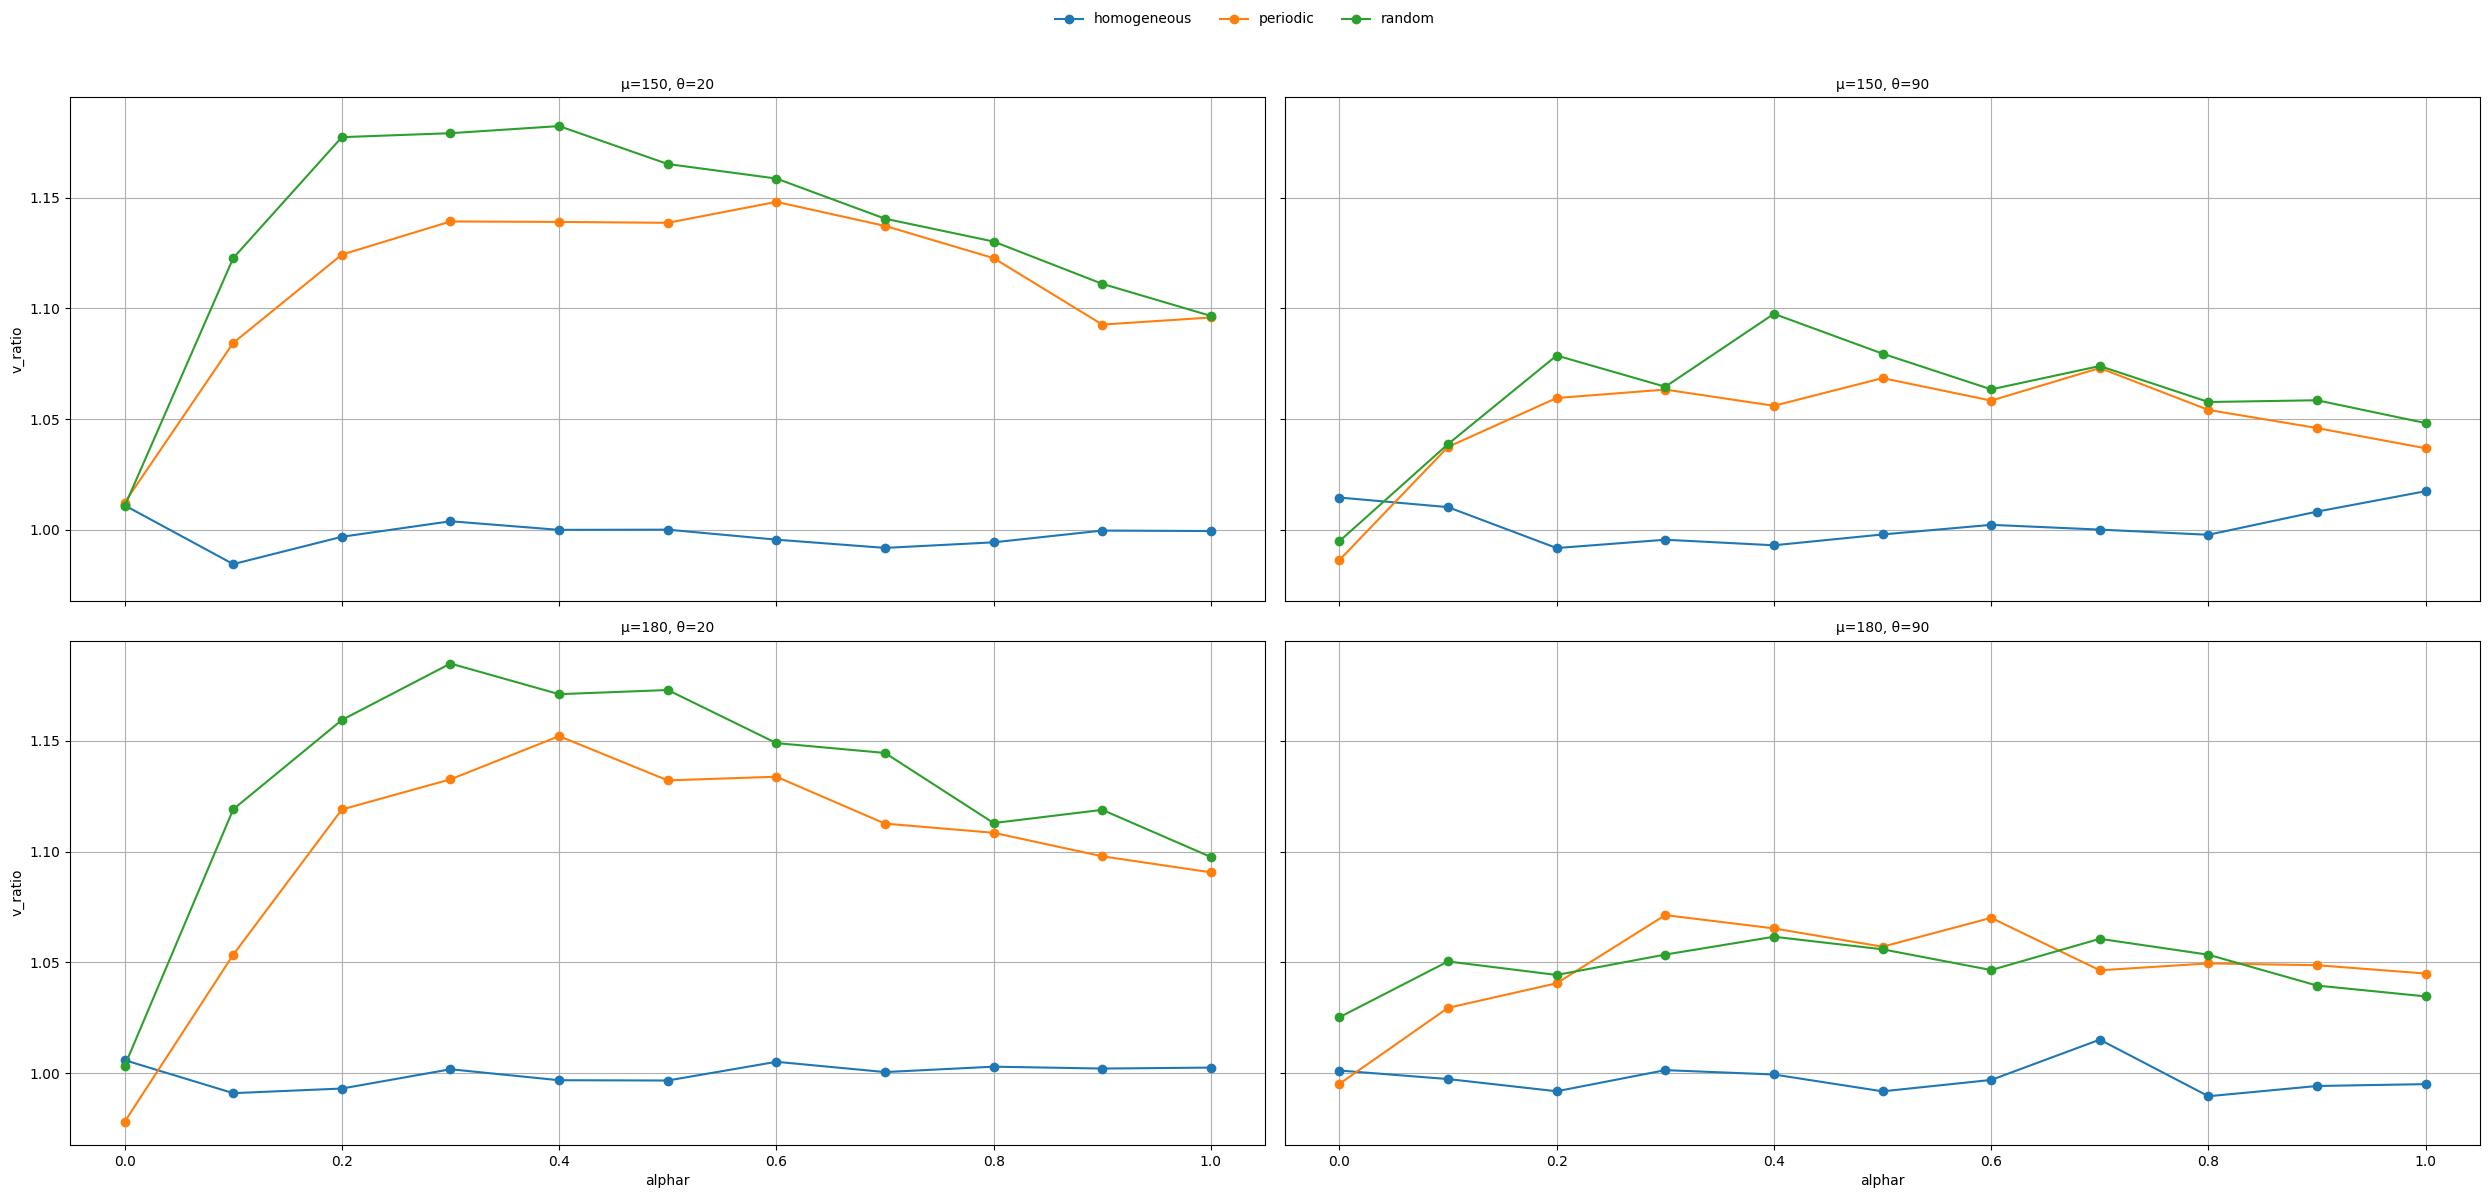

In [5]:
# Ratio of : with memory / without memory (all passive)
# In function of alphar
# For different couples of mu theta


# Librairies
import numpy as np
import matplotlib.pyplot as plt
import polars as pl
from pathlib import Path


# Load files
root = Path("/home/nicolas/Documents/PhD/Workspace/nucleo/outputs/2026-02-08_PC__DATA_FACTS")
paths = [str(p) for p in root.glob("*/**/*.parquet")] or [str(p) for p in root.glob("*/*.parquet")]

lf = pl.scan_parquet(paths)
schema = lf.schema

scalar_dtypes = (
    pl.Int8, pl.Int16, pl.Int32, pl.Int64,
    pl.UInt8, pl.UInt16, pl.UInt32, pl.UInt64,
    pl.Float32, pl.Float64,
    pl.Boolean, pl.String
)

cols_scalar = [
    name for name, dtype in schema.items()
    if isinstance(dtype, scalar_dtypes)
]

df_all = (
    pl.scan_parquet(paths)
    .select(cols_scalar)
    .collect()
    .sort(by=[
        "algorithm", "fact", "factmode",
        "landscape", "s", "l", "bpmin",
        "mu", "theta",
        "lmbda", 
        "alphar",
        "kB", "kU"
        ])
)
print(df_all.columns)
print(df_all.shape)


# Data
df_full = df_all.filter(
    pl.col("factmode") == "passive_full"
)
df_memory = df_all.filter(
    pl.col("factmode") == "passive_memory"
)
print(df_full.shape)
print(df_memory.shape)
v_mean_full = df_full["v_mean"].to_numpy()
v_mean_memory = df_memory["v_mean"].to_numpy()

v_mean_ratio = v_mean_memory / v_mean_full
print(len(v_mean_ratio))

df_memory = df_memory.with_columns([
    pl.lit(v_mean_ratio).alias("v_ratio")
])
# print(df_memory)


# Figure
landscapes = np.unique(df_memory["landscape"])
mus        = np.unique(df_memory["mu"].to_numpy())
thetas     = np.unique(df_memory["theta"].to_numpy())
alphars    = np.unique(df_memory["alphar"].to_numpy())
print(f"mus={mus} - thetas={thetas}")
kb         = np.unique(df_memory["kB"].to_numpy())
kU         = np.unique(df_memory["kU"].to_numpy())

fig, axes = plt.subplots(
    nrows=len(mus),
    ncols=len(thetas),
    figsize=(25, 12),
    sharex=True,
    sharey=True
)

for i, mu in enumerate(mus):
    for j, theta in enumerate(thetas):

        ax = axes[i, j]

        df_filtered = df_memory.filter(
            (pl.col("mu") == mu) &
            (pl.col("theta") == theta)
        )

        if df_filtered.is_empty():
            ax.set_visible(False)
            continue

        for landscape in landscapes:
            df_plot = df_filtered.filter(
                pl.col("landscape") == landscape
            )

            if df_plot.is_empty():
                continue

            v_ratio = df_plot["v_ratio"].to_numpy()
            alphar  = df_plot["alphar"].to_numpy()

            ax.plot(
                alphar,
                v_ratio,
                marker="o",
                label=landscape
            )

        ax.grid(True)

        ax.set_title(f"μ={mu}, θ={theta}", fontsize=10)

        if i == len(mus) - 1:
            ax.set_xlabel("alphar")
        if j == 0:
            ax.set_ylabel("v_ratio")

handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(
    handles, labels,
    loc="upper center",
    ncol=len(landscapes),
    frameon=False
)

fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

(792, 47)
(198, 47)
['homogeneous' 'periodic' 'random']


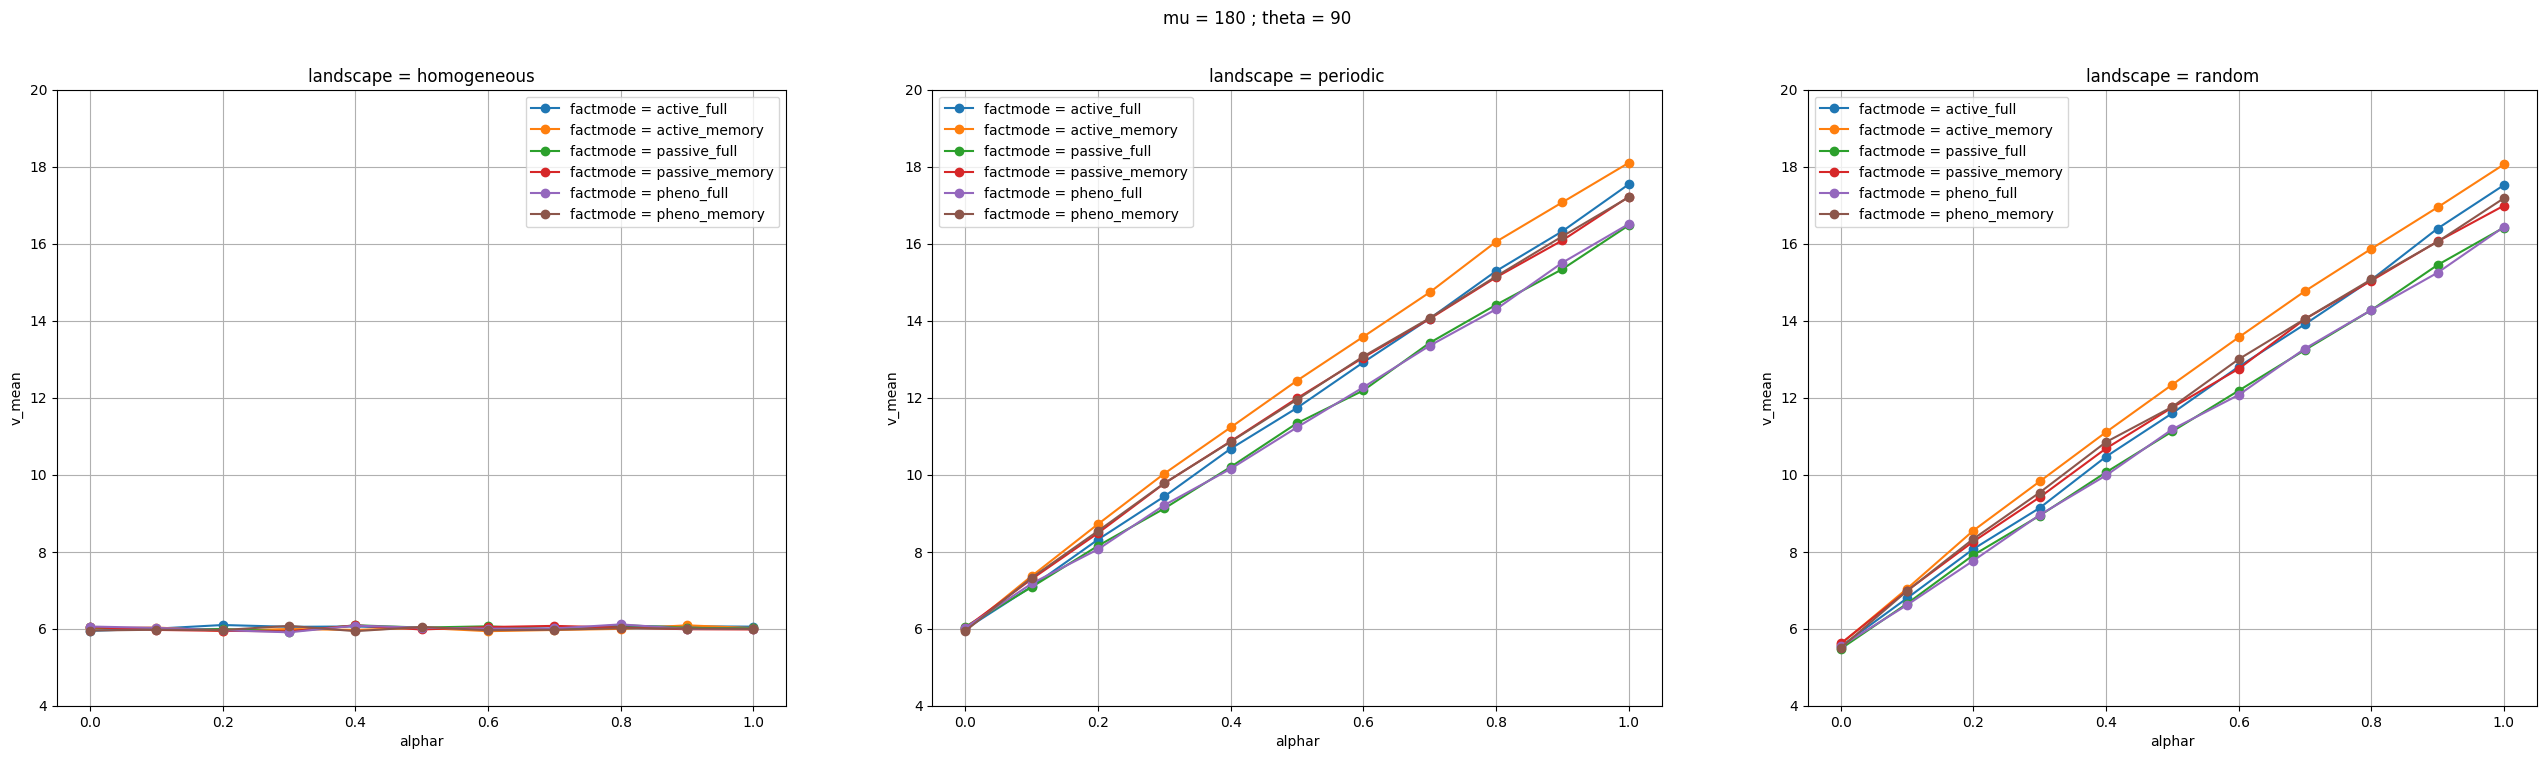

(792, 47)
(198, 47)
['homogeneous' 'periodic' 'random']


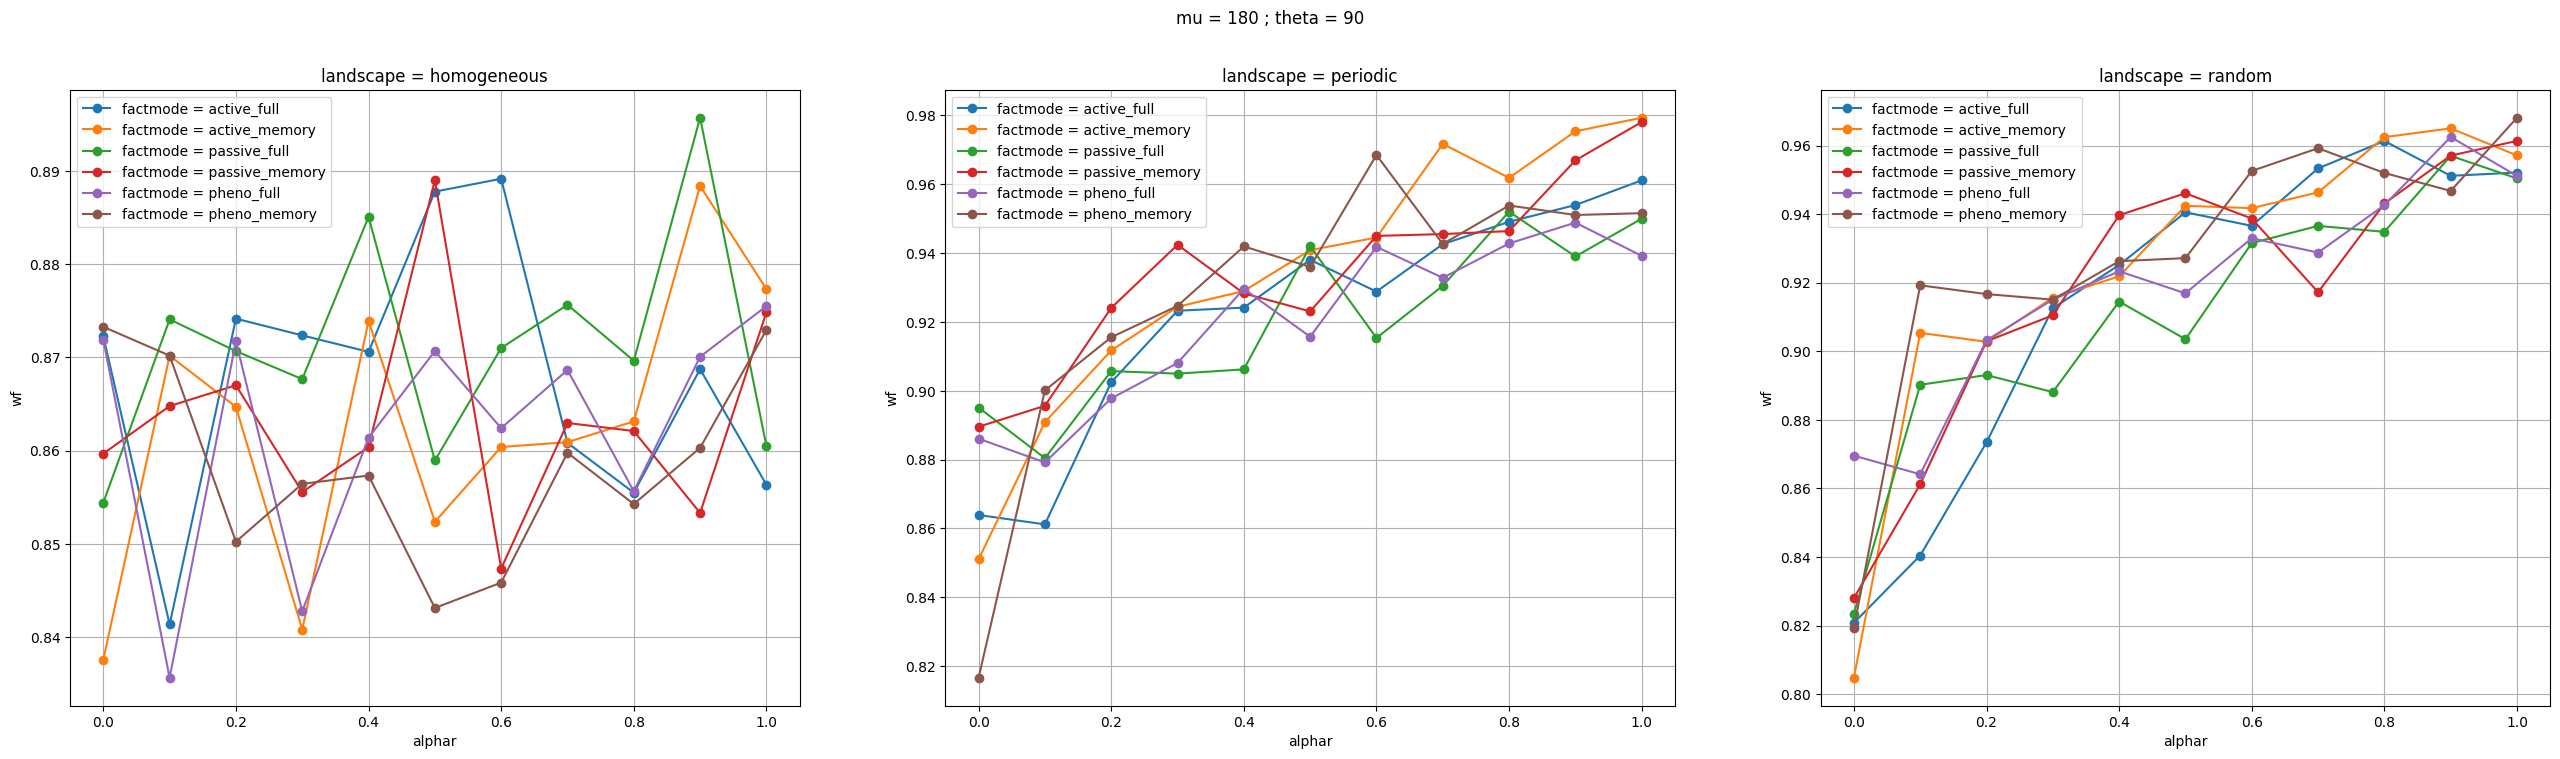

In [8]:
mu_w, theta_w = 180, 90

df_verif = df_all.filter(
    (pl.col("mu") == mu_w) &
    (pl.col("theta") == theta_w)
)

landscapes  = np.unique(df_verif["landscape"])
factmodes   = np.unique(df_verif["factmode"])

print(df_all.shape)
print(df_verif.shape)
print(landscapes)

fig, axes = plt.subplots(nrows=1, ncols=len(landscapes), figsize=(32,8))
plt.suptitle(f"mu = {mu_w} ; theta = {theta_w}")

for i, landscape in enumerate(landscapes):
    ax = axes[i]

    df_one = df_verif.filter(
        pl.col("landscape") == landscape
    )
    
    for factmode in factmodes:
        df_factmode = df_one.filter(
            pl.col("factmode") == factmode
        )
        
        alphar = df_factmode["alphar"].to_numpy()
        v_mean = df_factmode["v_mean"].to_numpy()

        ax.plot(alphar, v_mean, marker ="o", label=f"factmode = {factmode}")
        
    ax.set_title(f"landscape = {landscape}")
    ax.set_ylim([4, 20])
    ax.set_xlabel("alphar")
    ax.set_ylabel("v_mean")
    ax.grid(True)
    ax.legend()

# plt.tight_layout()
plt.show()




mu_w, theta_w = 180, 90

df_verif = df_all.filter(
    (pl.col("mu") == mu_w) &
    (pl.col("theta") == theta_w)
)

landscapes  = np.unique(df_verif["landscape"])
factmodes   = np.unique(df_verif["factmode"])

print(df_all.shape)
print(df_verif.shape)
print(landscapes)

fig, axes = plt.subplots(nrows=1, ncols=len(landscapes), figsize=(32,8))
plt.suptitle(f"mu = {mu_w} ; theta = {theta_w}")

for i, landscape in enumerate(landscapes):
    ax = axes[i]

    df_one = df_verif.filter(
        pl.col("landscape") == landscape
    )
    
    for factmode in factmodes:
        df_factmode = df_one.filter(
            pl.col("factmode") == factmode
        )
        
        alphar = df_factmode["alphar"].to_numpy()
        wf = df_factmode["wf"].to_numpy()

        ax.plot(alphar, wf, marker ="o", label=f"factmode = {factmode}")
        
    ax.set_title(f"landscape = {landscape}")
    # ax.set_ylim([4, 20])
    ax.set_xlabel("alphar")
    ax.set_ylabel("wf")
    ax.grid(True)
    ax.legend()

# plt.tight_layout()
plt.show()

['algorithm', 'fact', 'factmode', 'landscape', 's', 'l', 'bpmin', 'mu', 'theta', 'alphaf', 'alphao', 'beta', 'lmbda', 'rtot_capt', 'rtot_rest', 'alphad', 'alphar', 'kB', 'kU', 'Lmin', 'Lmax', 'bps', 'origin', 'tmax', 'dt', 'nt', 's_mean', 'l_mean', 'alpha_mean_v', 'alpha_mean_c', 'v_mean', 'v_med', 'v_mean_th', 'v_mean_th_eff', 'vf', 'Cf', 'wf', 'vf_std', 'Cf_std', 'wf_std', 'vi_mean', 'vi_med', 'vi_mp', 'c_linker', 'c_nucleo', 'vi_bp_mean', 'vi_bp_med']
(792, 47)
(198, 47)
['homogeneous' 'periodic' 'random']
['active_full' 'active_memory' 'passive_full' 'passive_memory'
 'pheno_full' 'pheno_memory']


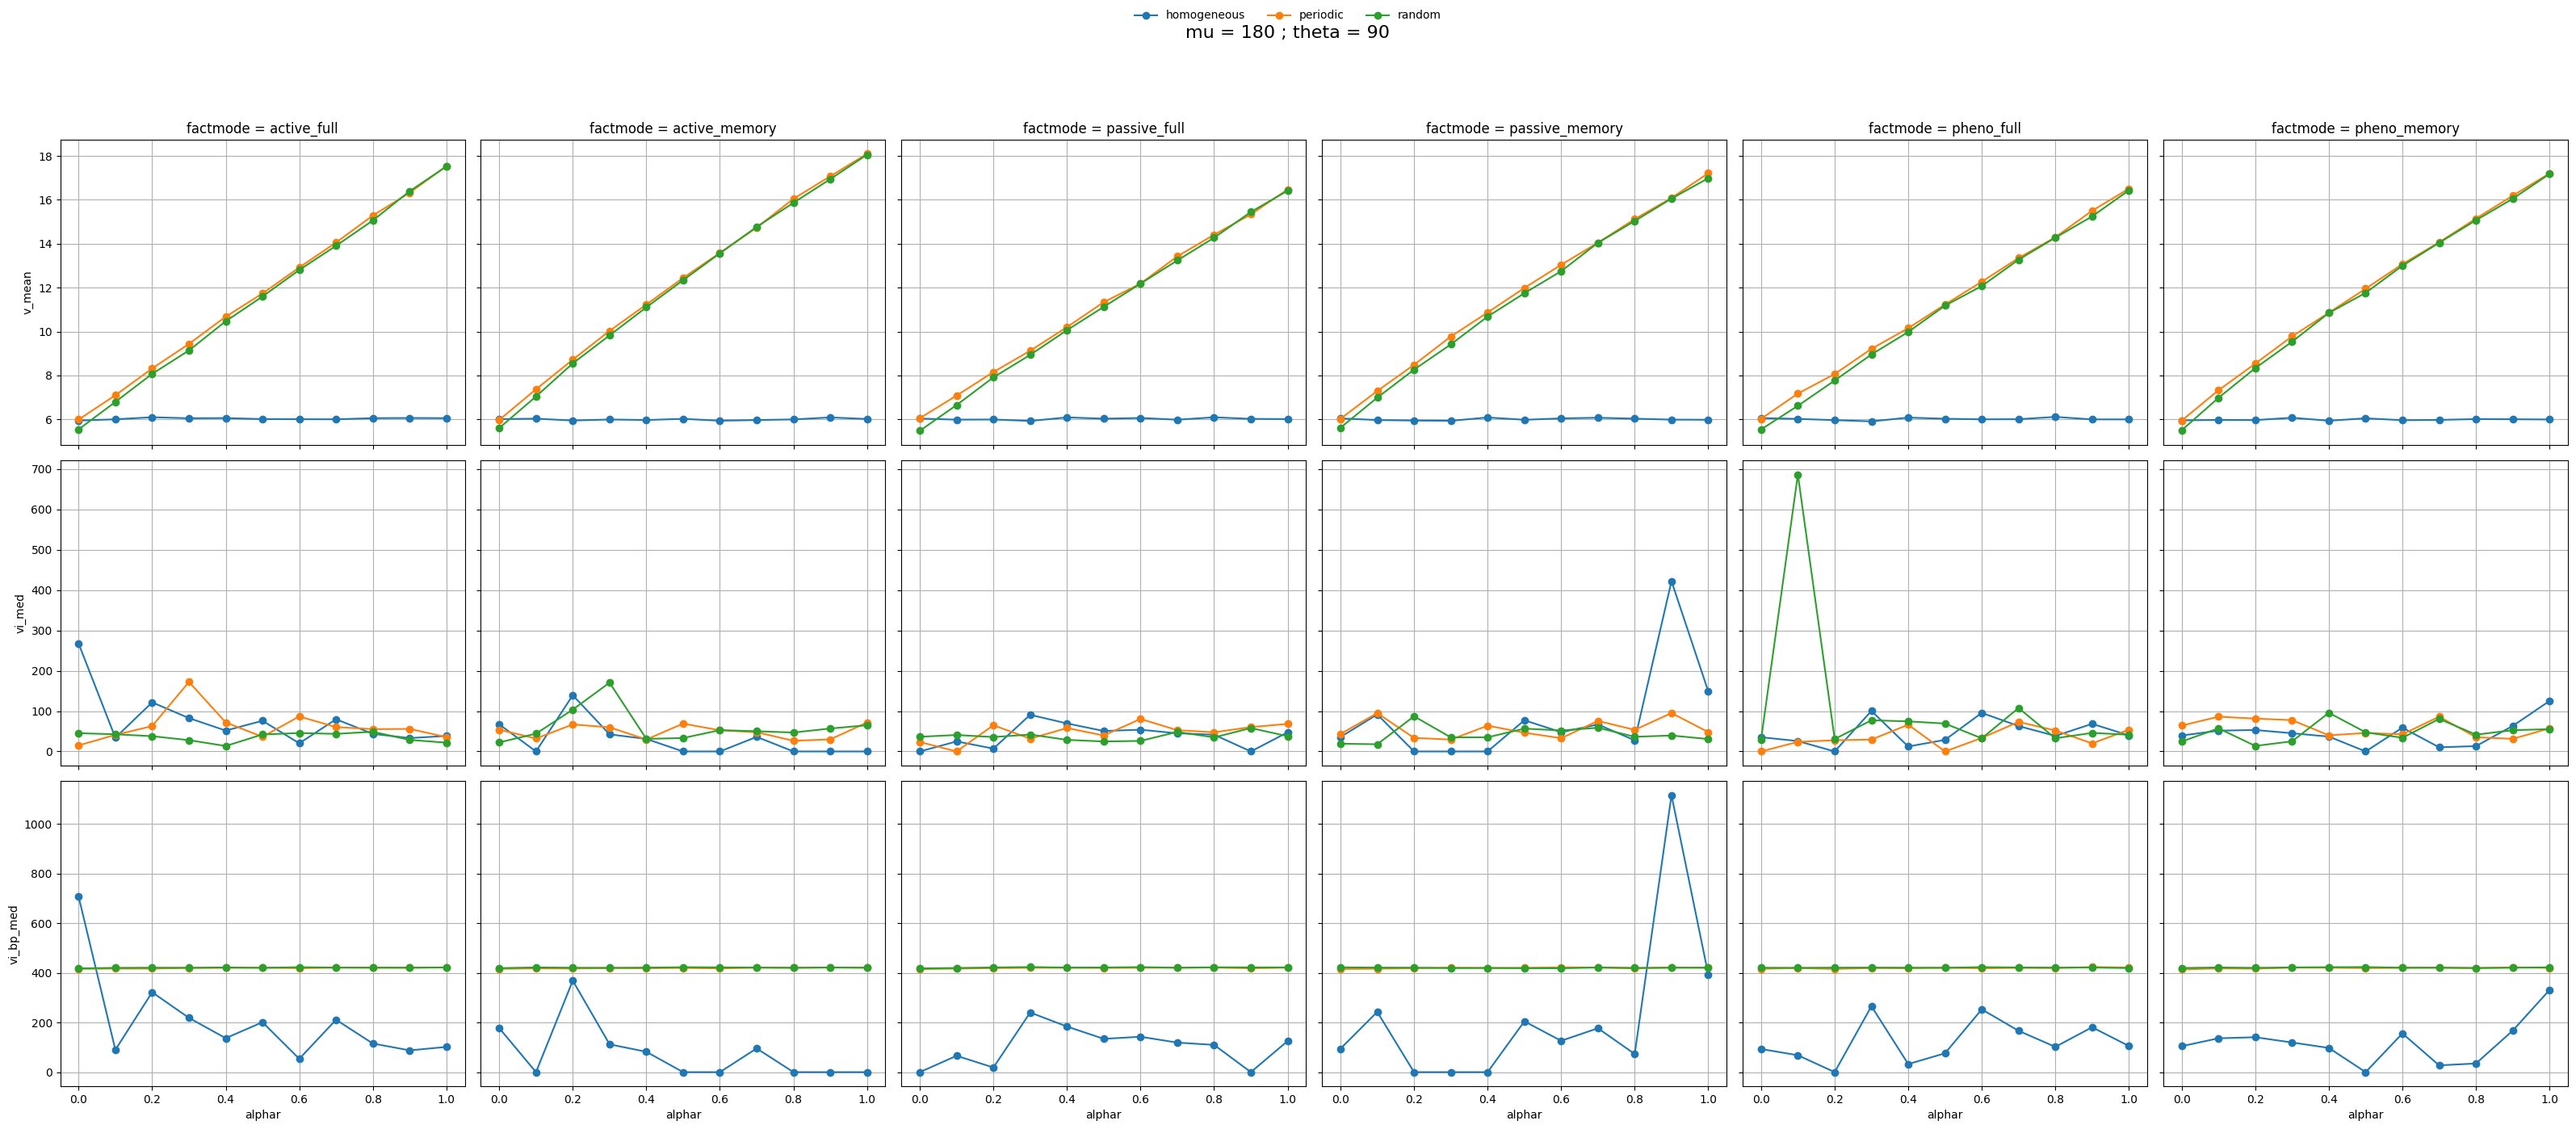

In [9]:
mu_w, theta_w = 180, 90

df_verif = (
    df_all
    .filter(
        (pl.col("mu") == mu_w) &
        (pl.col("theta") == theta_w)
    )
    .sort(["factmode", "landscape", "alphar"])
)

landscapes = np.unique(df_verif["landscape"])
factmodes  = np.unique(df_verif["factmode"])

print(df_all.columns)
print(df_all.shape)
print(df_verif.shape)
print(landscapes)
print(factmodes)

# --- Figure layout --- #
fig, axes = plt.subplots(
    nrows=3,
    ncols=len(factmodes),
    figsize=(32, 14),
    sharex=True,
    sharey="row"
)

plt.suptitle(f"mu = {mu_w} ; theta = {theta_w}", fontsize=16)

# Sécurité si un seul factmode
if len(factmodes) == 1:
    axes = axes.reshape(3, 1)

# --- Loop over factmodes (columns) --- #
for j, factmode in enumerate(factmodes):

    df_factmode = df_verif.filter(
        pl.col("factmode") == factmode
    )

    for landscape in landscapes:
        df_plot = df_factmode.filter(
            pl.col("landscape") == landscape
        )

        alphar = df_plot["alphar"].to_numpy()

        # --- Row 1 : v_mean --- #
        axes[0, j].plot(
            alphar,
            df_plot["v_mean"].to_numpy(),
            marker="o",
            label=f"{landscape}"
        )

        # --- Row 2 : vi_med --- #
        axes[1, j].plot(
            alphar,
            df_plot["vi_med"].to_numpy(),
            marker="o"
        )

        # --- Row 3 : vi_bp_med --- #
        axes[2, j].plot(
            alphar,
            df_plot["vi_bp_med"].to_numpy(),
            marker="o"
        )

    axes[0, j].set_title(f"factmode = {factmode}")
    axes[2, j].set_xlabel("alphar")

    for i in range(3):
        axes[i, j].grid(True)

# --- Y labels (one per row) --- #
axes[0, 0].set_ylabel("v_mean")
axes[1, 0].set_ylabel("vi_med")
axes[2, 0].set_ylabel("vi_bp_med")

# --- Legend (global, clean) --- #
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(
    handles,
    labels,
    loc="upper center",
    ncol=len(landscapes),
    frameon=False
)

plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()



# .